In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


In [2]:
# Fetching the Data
mnist = fetch_mldata('MNIST original')

In [3]:
# Assigning variables to the data, analysing the shape of X
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
#analysing the shape of y
y.shape

(70000,)

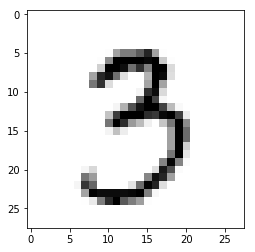

In [5]:
# Image display
digit = X[20000]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.show()

In [6]:
# Data splitting 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
# Data shuffling
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle], y_train[shuffle]

In [8]:
# Data fitting
SGD_classifier = SGDClassifier(random_state=42)
SGD_classifier.fit(X_train, y_train)


C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
# Cross Validation before scaling 
cross_val_score(SGD_classifier, X_train, y_train, cv=10, scoring="accuracy")

C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\susmi

array([ 0.85697636,  0.84957521,  0.86068989,  0.8705    ,  0.86583333,
        0.85180863,  0.83030505,  0.81230205,  0.83641821,  0.87641761])

In [10]:
# data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [11]:
# Cross Validation after scaling 
cross_val_score(SGD_classifier, X_train_scaled, y_train, cv=5, scoring="accuracy")

C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\susmi

array([ 0.90828821,  0.91168139,  0.91541667,  0.90756022,  0.90646882])

In [12]:
# Prediction 
y_train_pred = cross_val_predict(SGD_classifier, X_train_scaled, y_train, cv=3)
y_train_pred

C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\susmi

array([ 3.,  5.,  0., ...,  5.,  0.,  4.])

In [13]:
# Finding Confusion Matrices
confusion_Matrix = confusion_matrix(y_train, y_train_pred)
confusion_Matrix

array([[5730,    2,   20,   13,   10,   51,   46,    9,   40,    2],
       [   2, 6488,   47,   29,    5,   41,    7,   10,  102,   11],
       [  50,   43, 5318,  115,   88,   24,   95,   55,  155,   15],
       [  46,   43,  133, 5338,    2,  244,   38,   57,  137,   93],
       [  17,   26,   31,    8, 5395,   10,   49,   26,   79,  201],
       [  64,   42,   35,  181,   74, 4621,  106,   27,  174,   97],
       [  37,   25,   51,    2,   47,   93, 5610,    8,   45,    0],
       [  27,   21,   64,   32,   55,    9,    6, 5812,   15,  224],
       [  48,  166,   78,  158,   17,  162,   58,   24, 5000,  140],
       [  42,   31,   28,   91,  163,   40,    2,  229,   79, 5244]], dtype=int64)

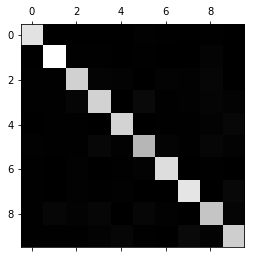

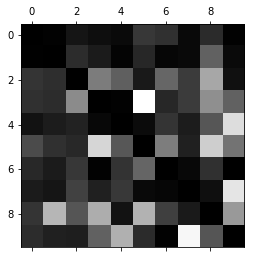

In [14]:
def plot_confusion_matrix(matrix):

    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plt.matshow(confusion_Matrix, cmap=plt.cm.gray)
plt.show()

row_sums = confusion_Matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_Matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [15]:

y_sgd_pred = SGD_classifier.predict(X_test)

# Accuracy Score
accuracy_score(y_test, y_sgd_pred)

0.88980000000000004

In [16]:
# Precision Score
print (precision_score(y_train, y_train_pred, average = None))
print (precision_score(y_train, y_train_pred, average = 'weighted'))

[ 0.94507669  0.94206476  0.9161068   0.89458689  0.92127732  0.8727101
  0.93235832  0.92887965  0.85822176  0.87008462]
0.908995776042


In [17]:
# Recall Score
print(recall_score(y_train, y_train_pred, average = None))
print(recall_score(y_train, y_train_pred, average = 'weighted'))

[ 0.96741516  0.96232572  0.8925814   0.87065732  0.92348511  0.85242575
  0.94795539  0.92769354  0.85455478  0.88149269]
0.909266666667


In [18]:
# F1 Score
print(f1_score(y_train, y_train_pred, average = None))
print(f1_score(y_train, y_train_pred, average = 'weighted'))

[ 0.95611547  0.95208746  0.90419111  0.88245991  0.92237989  0.86244867
  0.94009217  0.92828622  0.85638435  0.8757515 ]
0.909053076573


In [20]:
# y score 
y_scores = SGD_classifier.decision_function([digit])
y_scores


array([[-267288.97386669, -403502.79698194, -162866.03750391,
         241990.22112251, -341487.55640378, -141623.1034629 ,
        -598531.19551282, -301898.98942106, -311370.85897949,
        -156643.28099131]])

In [21]:
y_train_all = (y_train == [0 or 1 or 2 or 3 or 4 or 5 or 6 or 7 or 8 or 9])
y_train_all

array([False, False, False, ..., False, False, False], dtype=bool)

In [22]:
# analysing shape of y score
y_scores = cross_val_predict(SGD_classifier, X_train, y_train_all, cv=2, method = "decision_function")
y_scores.shape

C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\susmitha kolli\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(60000,)

In [23]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

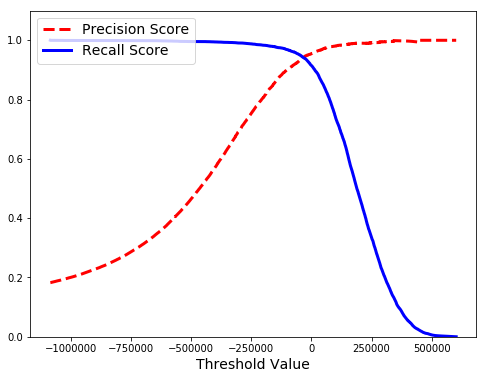

In [27]:
# Precision,Recall vs Threshold plot
precisions, recalls, thresholds = precision_recall_curve(y_train_all, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "r--", label="Precision Score", linewidth=3)
    plt.plot(thresholds, recalls[:-1], "b-", label="Recall Score", linewidth=3)
    plt.xlabel("Threshold Value", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.ylim([0, 1.1])

plt.figure(figsize=(8, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.xlim([-700000, 700000])
plt.show()


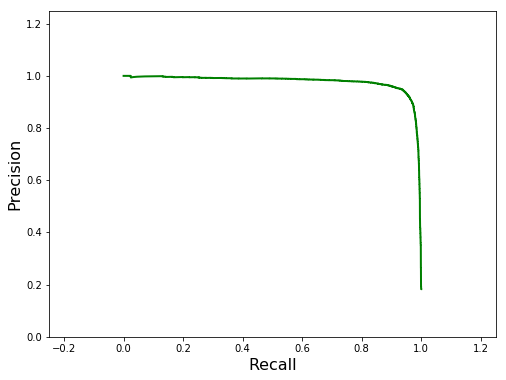

In [28]:
# Precision_vs_Recall plot
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([-0.25, 1.25, 0, 1.25])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

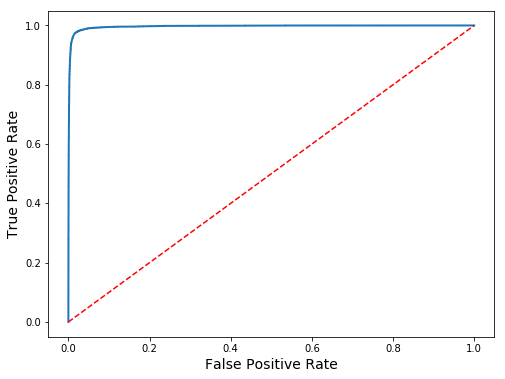

In [30]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_train_all, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()
